# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

We need to analyize on trading volume of Ethereum from 01Jan2020-30Jun2021, for this capstone we will use BeautifulSoap library whereby allow us to retrieve data from coingecko sites and after doing webscrapping, we can utilize this data to Pandas Data Frame

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
import requests

url_get = requests.get('https://www.coingecko.com/en/coins/ethereum/historical_data/usd?start_date=2020-01-01&end_date=2021-06-30#panel')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:500]

b'!DOCTYPE html>\n<html lang="en">\n<head>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1.0">\n<link rel="shortcut icon" href="/favicon.ico">\n<link type="application/opensearchdescription+xml" rel="search" href="/OpensearchDescription.xml" />\n<title>Ethereum USD Historical Data | CoinGecko</title>\n<meta name="description" content="Get Ethereum (ETH) USD historical prices." />\n\n\n<script>(function(w,d,s,l,'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [4]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [5]:
table = soup.find('table',attrs={'class':'table table-striped text-sm text-lg-normal'})
print(table.prettify()[1:500])

table class="table table-striped text-sm text-lg-normal">
 <thead>
  <tr>
   <th class="text-center">
    Date
   </th>
   <th class="text-center">
    Market Cap
   </th>
   <th class="text-center">
    Volume
   </th>
   <th class="text-center">
    Open
   </th>
   <th class="text-center">
    Close
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <th class="font-semibold text-center" scope="row">
    2021-06-30
   </th>
   <td class="text-center">
    $253,607,549,372
   </td>
   <td class="te


Finding row length.

In [6]:
#row length is based on period as header, while data is under period
temp = soup.find_all('th',attrs={'class':'font-semibold text-center'})
row_length = len(temp)
row_length

547

Do the scrapping process here (please change this markdown with your explanation)

In [7]:
temp = [] #initiating a tuple

for i in range(0, row_length):
    # get period
    period = soup.find_all('th',attrs={'class':'font-semibold text-center'})[i].text
    period = period.strip('\n')
    
    # get Market Cap
    #MarketCap = soup.find_all('td',attrs={'class':'text-center'})[i*4].text
    #MarketCap = MarketCap.strip('\n')
    
    # get Volume
    Volume = soup.find_all('td',attrs={'class':'text-center'})[i*4+1].text
    Volume = Volume.strip('\n')
    
    # get Open
    #Open = soup.find_all('td',attrs={'class':'text-center'})[i*4+2].text
    #Open = Open.strip('\n')
    
    # get Close
    #Close = soup.find_all('td',attrs={'class':'text-center'})[i*4+3].text
    #Close = Close.strip('\n')
    
    #scrapping process
    temp.append((period,Volume))
    
temp 

[('2021-06-30', '$27,149,143,847'),
 ('2021-06-29', '$30,629,329,806'),
 ('2021-06-28', '$24,316,408,028'),
 ('2021-06-27', '$24,249,510,321'),
 ('2021-06-26', '$25,981,381,067'),
 ('2021-06-25', '$22,447,489,242'),
 ('2021-06-24', '$28,098,744,045'),
 ('2021-06-23', '$38,755,019,937'),
 ('2021-06-22', '$39,499,960,408'),
 ('2021-06-21', '$26,235,850,447'),
 ('2021-06-20', '$20,456,963,375'),
 ('2021-06-19', '$26,204,484,921'),
 ('2021-06-18', '$25,708,624,827'),
 ('2021-06-17', '$26,150,320,395'),
 ('2021-06-16', '$26,803,957,680'),
 ('2021-06-15', '$28,128,172,338'),
 ('2021-06-14', '$29,382,118,964'),
 ('2021-06-13', '$28,235,882,062'),
 ('2021-06-12', '$26,751,786,966'),
 ('2021-06-11', '$33,075,957,437'),
 ('2021-06-10', '$43,973,432,438'),
 ('2021-06-09', '$48,344,195,674'),
 ('2021-06-08', '$37,385,872,210'),
 ('2021-06-07', '$29,050,162,249'),
 ('2021-06-06', '$34,731,979,705'),
 ('2021-06-05', '$39,996,583,175'),
 ('2021-06-04', '$38,104,663,185'),
 ('2021-06-03', '$39,148,856

In [8]:
# ordering period ascending
temp = temp[::-1]
temp

[('2020-01-01', '$7,103,187,151'),
 ('2020-01-02', '$6,623,732,041'),
 ('2020-01-03', '$6,497,297,884'),
 ('2020-01-04', '$9,655,245,100'),
 ('2020-01-05', '$6,958,393,690'),
 ('2020-01-06', '$7,260,645,128'),
 ('2020-01-07', '$9,514,201,882'),
 ('2020-01-08', '$9,440,938,788'),
 ('2020-01-09', '$10,095,847,759'),
 ('2020-01-10', '$7,280,640,218'),
 ('2020-01-11', '$10,273,370,788'),
 ('2020-01-12', '$9,737,605,323'),
 ('2020-01-13', '$8,488,793,478'),
 ('2020-01-14', '$8,019,794,567'),
 ('2020-01-15', '$18,970,204,899'),
 ('2020-01-16', '$17,862,385,532'),
 ('2020-01-17', '$14,605,493,159'),
 ('2020-01-18', '$15,915,322,020'),
 ('2020-01-19', '$15,808,136,411'),
 ('2020-01-20', '$14,003,433,869'),
 ('2020-01-21', '$10,983,216,126'),
 ('2020-01-22', '$8,267,420,453'),
 ('2020-01-23', '$8,809,189,829'),
 ('2020-01-24', '$9,017,537,604'),
 ('2020-01-25', '$11,043,498,595'),
 ('2020-01-26', '$8,673,816,085'),
 ('2020-01-27', '$10,518,901,915'),
 ('2020-01-28', '$12,435,457,693'),
 ('2020-

## Creating data frame & Data wrangling

Put the array into dataframe

In [9]:
import pandas as pd

df = pd.DataFrame(temp,columns = ('period','Volume'))
df.head()

,period,Volume
0,2020-01-01,"$7,103,187,151"
1,2020-01-02,"$6,623,732,041"
2,2020-01-03,"$6,497,297,884"
3,2020-01-04,"$9,655,245,100"
4,2020-01-05,"$6,958,393,690"


In [10]:
df.dtypes

period    object
Volume    object
dtype: object

In [11]:
df['period'] = df['period'].astype('datetime64')

df['Volume'] = df['Volume'].str.replace("$","")
df['Volume'] = df['Volume'].str.replace(",","")
df['Volume'] = df['Volume'].astype('float64')


df.dtypes

C:\Users\STANLE~1\AppData\Local\Temp/ipykernel_1520/2840468810.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Volume'] = df['Volume'].str.replace("$","")


period    datetime64[ns]
Volume           float64
dtype: object

Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)


- update period to datetime
- ommit `$` symbol
- ommit `,` symbol
- update numeric values to float64
- update Close Price on 30Jun2021 from N/A to Open Price

Data visualisation (please change this markdown with your explanation of what you do for data wrangling)
- set index to `period`
- we use line chart for giving insight of trading volume of Ethereum from Jan2020-Jun2021

In [12]:
df = df.set_index('period')

<AxesSubplot:title={'center':'Ethereum Trading Volume from Jan2020-Jun2021'}, xlabel='Period', ylabel='Volume'>

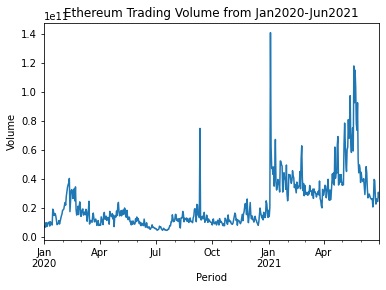

In [13]:
df['Volume'].plot(
    xlabel = 'Period',
    ylabel = "Volume",
    title = "Ethereum Trading Volume from Jan2020-Jun2021"
)

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

Ethereum Trading Volume is hiking up on 11Sept2020 (`$74,747,424,441`) and the highest volume happened on 04Jan2021 (`$140,906,534,191`) continue to fluctuate from Jan to May 2021, volume increase again in May2021.

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.